In [37]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from math import sqrt
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
import pandas_datareader
import math
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from prettytable import PrettyTable

In [38]:
!pip install QuantStats  PyPortfolioOpt

In [39]:
# Importing libraries for portfolio optimization
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt import plotting
from pypfopt import objective_functions
import quantstats as qs
from pypfopt import HRPOpt

In [40]:
#Total years of traing model
years=1.2
# Define the end date
fecha = "2023-01-02"
end=fecha
# Convert the end date string to a datetime object
end_date = datetime.strptime(end, "%Y-%m-%d")
# Calculate the start date as one year before the end date
start_date = end_date - timedelta(days=365*years)
# Convert the start date to a string in the same format as the end date
start = start_date.strftime("%Y-%m-%d")

print("Start Date:", start)
print("End Date:", end)

Start Date: 2021-10-21
End Date: 2023-01-02


In [41]:
## define the stocks for our portfolio (via tickers) ###
assets = [ #Healthcare
          "JNJ", #(Johnson & Johnson)
          #"PFE", #(Pfizer Inc.)
          "MRK", #(Merck & Co. Inc.)
          "LLY", #(Eli Lilly and company)
          "UNH", #(UnitedHealth Group Incorporated)
          #"AMGN", #(Amgen Inc.)
          #Technology
          "MSFT", #(Microsoft Corporation)
          "GOOGL", #(Alphabet Inc. - Google)
          "META", #(Meta Platforms Inc. - Facebook)
          "NVDA", #(Nvidia)
          #"AMD", #(Advanced micro devices)
          "TSLA", #(Tesla, Inc.)
          "CRM", #(Salesforce.com Inc.)
          # Finance
          #"JPM", #(JPMorgan Chase & Co.)
          "MA", #(Mastercard)
          #"BX", #(Blackstone)
          "AXP", #(American Express)
          "GS", #(The Goldman Sachs Group, Inc.)
          #"BAC", #(Bank of America Corporation)
          "V", #(Visa Inc.)
          #Consumer goods
          #"PG", #(Procter & Gamble Company)
          #"KO", #(The Coca-Cola Company)
          #"NKE", #(Nike, Inc.)
          #"MCD", #(McDonald's Corporation)
          #Energy
          #"XOM", #(Exxon Mobil Corporation)
          "CVX", #(Chevron Corporation)
          #"SHEL", #(Royal Dutch Shell plc)
          #"BP", #(BP p.l.c.)
          #"COP", #(ConocoPhillips)
          #Retail
          "AMZN", #(Amazon.com, Inc.)
          "WMT", #(Walmart Inc.)
          "TGT", #(Target Corporation)
          "COST", #(Costco Wholesale Corporation)
          "HD", #(The Home Depot, Inc.)
          #Telecommunications
          "T", #(AT&T Inc.)
          "VZ", #(Verizon Communications Inc.)
          #"TMUS", #(T-Mobile US, Inc.)
          #Utilities
          "NEE", #(NextEra Energy, Inc.)
          #"DUK", #(Duke Energy Corporation)
          "SO", #(The Southern Company)
          #"NRG", #(NRG Energy)
          #"EXC", #(Exelon Corporation)
          #"AEP", #(American Electric Power Company, Inc.)
          #Real Estate
          #"SPG", #(Simon Property Group, Inc.)
          #"AMT", #(American Tower Corporation)
          #"EQIX", #(Equinix, Inc.)
          #"PSA", #(Public Storage)
          #"WELL", #(Welltower Inc.)
          #Transportation
          "UPS", #(United Parcel Service, Inc.)
          #"FDX", #(FedEx Corporation)
          #"DAL", #(Delta Air Lines, Inc.)
          #"AAL", #(American Airlines Group Inc.)
          #"BLDR", #(Builders first source)
          "UBER", #(Uber Technologies, Inc.)
          #cripto
          "BTC-USD", #Bitcoin
          "ETH-USD" #Ethereum
          ]
#IAU iShares Gold Trust
#MA Mastercard
assets =sorted(assets)
# Acquire data
df_prices = yf.download(assets,start=start,end=end)['Adj Close']
df_prices = df_prices.dropna()

[*********************100%%**********************]  56 of 56 completed


In [46]:
def bl(df_prices):
  # Calculating the annualized expected returns and the annualized sample covariance matrix
  mu = mean_historical_return(df_prices) #expected returns
  S = CovarianceShrinkage(df_prices).ledoit_wolf() #Covariance matrix
  ef = EfficientFrontier(mu, S)
  #ef.add_constraint(lambda x: x >= 0.05)  # Minimum allocation for each asset
  ef.add_constraint(lambda x: x >= 0)  # Ensure weights are non-negative
  ef.add_constraint(lambda x : x <= 0.20)
  ef.add_objective(objective_functions.L2_reg, gamma=0.1)
  ef.max_sharpe()
  weights_BL = ef.clean_weights() # Cleaning weights
  BL_model_weight= [weights_BL[i] for i in weights_BL]
  #print(BL_model_weight)
  return BL_model_weight


In [47]:
#Number of periods
periods=7
#Number of days of the period
leng_period=60


assets =sorted(assets)
# Acquire data
df_prices = yf.download(assets,start=start,end=end)['Adj Close']
df_prices = df_prices.dropna()

[*********************100%%**********************]  56 of 56 completed


In [48]:
weights=[]
table = PrettyTable()
table.field_names = ["Start Date", "End Date"]
for i in range(periods):
  # Convert the end date string to a datetime object
  end_date = datetime.strptime(end, "%Y-%m-%d")
  # Calculate the start date as one year before the end date
  start_date = end_date - timedelta(days=365*years)
  # Convert the start date to a string in the same format as the end date
  start = start_date.strftime("%Y-%m-%d")
  end = end_date.strftime("%Y-%m-%d")
  print(start, end)
  table.add_row([start, end])
  df_prices = yf.download(assets,start=start,end=end)['Adj Close']
  df_prices = df_prices.dropna()
  weight=bl(df_prices)
  # Append the weights for this period to the matrix
  weights.append(weight)
  end_date += timedelta(days=leng_period)
  end = end_date.strftime("%Y-%m-%d")

print(table)

2021-10-21 2023-01-02


[*********************100%%**********************]  56 of 56 completed


2021-12-20 2023-03-03


[*********************100%%**********************]  56 of 56 completed


2022-02-18 2023-05-02


[*********************100%%**********************]  56 of 56 completed


2022-04-19 2023-07-01


[*********************100%%**********************]  56 of 56 completed


2022-06-18 2023-08-30


[*********************100%%**********************]  56 of 56 completed


2022-08-17 2023-10-29


[*********************100%%**********************]  56 of 56 completed


2022-10-16 2023-12-28


[*********************100%%**********************]  56 of 56 completed


+------------+------------+
| Start Date |  End Date  |
+------------+------------+
| 2021-10-21 | 2023-01-02 |
| 2021-12-20 | 2023-03-03 |
| 2022-02-18 | 2023-05-02 |
| 2022-04-19 | 2023-07-01 |
| 2022-06-18 | 2023-08-30 |
| 2022-08-17 | 2023-10-29 |
| 2022-10-16 | 2023-12-28 |
+------------+------------+


In [49]:
start= fecha
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = start_date + timedelta(days=leng_period*periods)
end = end_date.strftime("%Y-%m-%d")

print("Start Date:", start)
print("End Date:", end)

initial_market_prices = yf.download("^GSPC",start=start,end=end)['Adj Close']
initial_df_prices = yf.download(assets,start=start,end=end)['Adj Close']
initial_df_prices = initial_df_prices.dropna()

[*********************100%%**********************]  1 of 1 completed

Start Date: 2023-01-02
End Date: 2024-02-26



[*********************100%%**********************]  56 of 56 completed


In [50]:
Total_invest=1_000
Total_invest_market=Total_invest
bl_portfolio = []
market=[]
portfolio=[]
otro=[]
table = PrettyTable()
table.field_names = ["Start Date", "End Date"]
for x in range(periods):
    # Convert the start date string to a datetime object
    start_date = datetime.strptime(start, "%Y-%m-%d")
    #sum leng period to the end date
    end_date = start_date + timedelta(days=leng_period)
    # Convert the end date to a string in the same format as the end date
    end = end_date.strftime("%Y-%m-%d")
    start= start_date.strftime("%Y-%m-%d")
    print(start, end)
    table.add_row([start, end])
    market_prices = yf.download("^GSPC",start=start,end=end)['Adj Close']

    df_prices = yf.download(assets,start=start,end=end)['Adj Close']
    df_prices = df_prices.dropna()
    portfolio= np.zeros(len(df_prices))
    # Loop through each asset and its weight, and calculate the contribution to the portfolio
    for i in range(len(assets)):
        asset_name = assets[i]
        asset_price = df_prices[asset_name]/df_prices[asset_name][0]
        asset_weight = weights[x][i]
        portfolio += asset_price * asset_weight
    portf = portfolio*Total_invest
    # Recalculation of the new total invest by the end of the period
    Total_invest=portfolio[-1]*Total_invest
    bl_portfolio.append(portf)
    market_prices=market_prices/initial_market_prices[0]*Total_invest_market
    market.append(market_prices)
    start_date += timedelta(days=leng_period)
    start= start_date.strftime("%Y-%m-%d")
print(table)

[*********************100%%**********************]  1 of 1 completed


2023-01-02 2023-03-03


[*********************100%%**********************]  56 of 56 completed
[*********************100%%**********************]  1 of 1 completed

2023-03-03 2023-05-02



[*********************100%%**********************]  56 of 56 completed
[*********************100%%**********************]  1 of 1 completed


2023-05-02 2023-07-01


[*********************100%%**********************]  56 of 56 completed
[*********************100%%**********************]  1 of 1 completed


2023-07-01 2023-08-30


[*********************100%%**********************]  56 of 56 completed
[*********************100%%**********************]  1 of 1 completed


2023-08-30 2023-10-29


[*********************100%%**********************]  56 of 56 completed
[*********************100%%**********************]  1 of 1 completed


2023-10-29 2023-12-28


[*********************100%%**********************]  56 of 56 completed
[*********************100%%**********************]  1 of 1 completed

2023-12-28 2024-02-26



[*********************100%%**********************]  56 of 56 completed

+------------+------------+
| Start Date |  End Date  |
+------------+------------+
| 2023-01-02 | 2023-03-03 |
| 2023-03-03 | 2023-05-02 |
| 2023-05-02 | 2023-07-01 |
| 2023-07-01 | 2023-08-30 |
| 2023-08-30 | 2023-10-29 |
| 2023-10-29 | 2023-12-28 |
| 2023-12-28 | 2024-02-26 |
+------------+------------+


In [51]:
for i in range(periods):
    SP500_earnings = (market[i][-1]-market[i][0])/market[i][0]
    print("Earning % S&P500:", SP500_earnings*100)
    BL_earnings=(bl_portfolio[i][-1]-bl_portfolio[i][0])/bl_portfolio[i][0]
    print("Earning % Markowitz portfolio:", BL_earnings*100)

Earning % S&P500: 4.110995138625503
Earning % Markowitz portfolio: -5.399800509387981
Earning % S&P500: 3.0212828589517335
Earning % Markowitz portfolio: 4.011904645970443
Earning % S&P500: 8.029939906837825
Earning % Markowitz portfolio: 4.300974193590699
Earning % S&P500: 0.9435347627760475
Earning % Markowitz portfolio: 5.873154798730904
Earning % S&P500: -8.804239982159647
Earning % Markowitz portfolio: -9.919481270244537
Earning % S&P500: 14.753703779872792
Earning % Markowitz portfolio: 11.294412616893844
Earning % S&P500: 6.385685780786043
Earning % Markowitz portfolio: 26.73612451940785


In [52]:
SP500_earnings = (market[-1][-1]-market[0][0])/market[0][0]
print("Earning % S&P500:", SP500_earnings*100)
BL_earnings=(bl_portfolio[-1][-1]-bl_portfolio[0][0])/bl_portfolio[0][0]
print("Earning % Markowitz portfolio:", BL_earnings*100)

Earning % S&P500: 33.07044061237984
Earning % Markowitz portfolio: 38.05834699187395


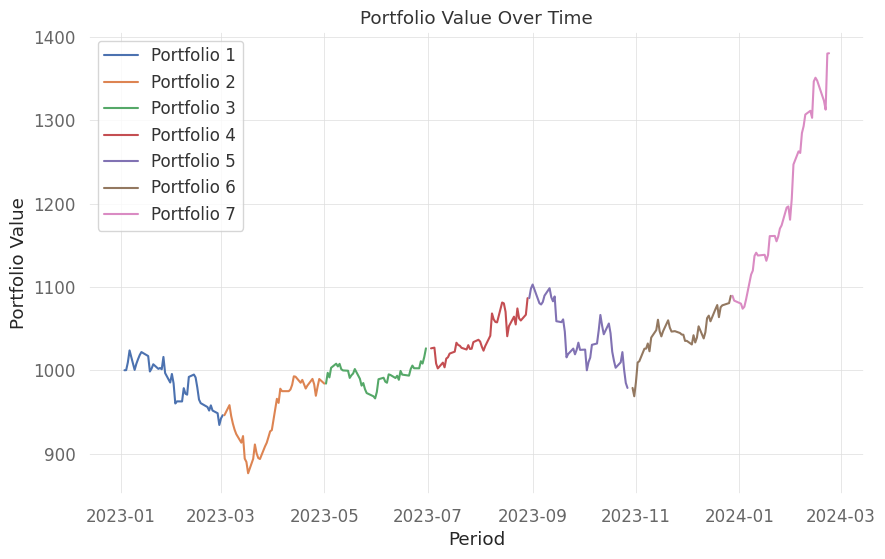

In [53]:
# Plot each array in bl_portfolio
for i, portfolio_values in enumerate(bl_portfolio):
    plt.plot(portfolio_values, label=f'Portfolio {i+1}')

plt.xlabel('Period')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

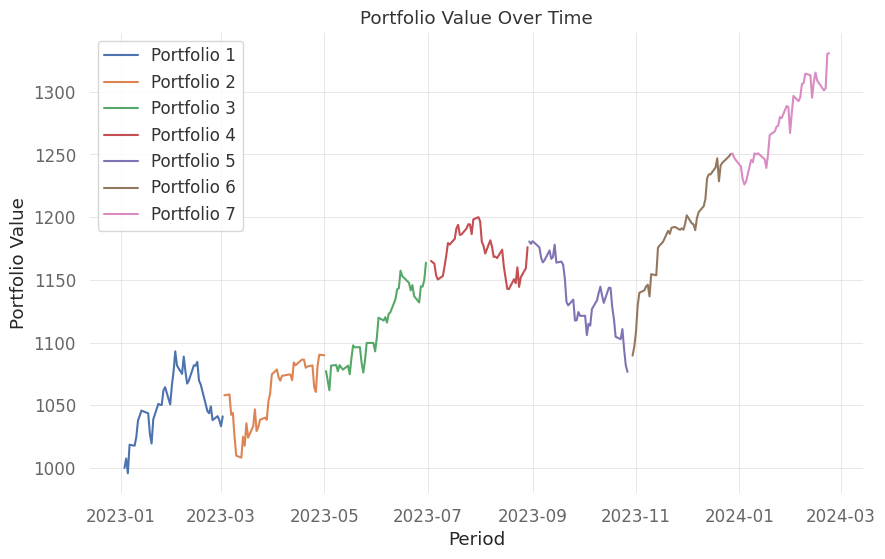

In [54]:
# Plot each array in bl_portfolio
for i, portfolio_values in enumerate(market):
    plt.plot(portfolio_values, label=f'Portfolio {i+1}')

plt.xlabel('Period')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

In [55]:
#convert to a dataframe
df_portfolio=pd.DataFrame(bl_portfolio)
# Replace all the nan to value 0. When you do a dataframe it will create several row per each run and the columns are the dates
df_portfolio.fillna(0, inplace=True)
#transpose to have the date as row and all the run as columns
df_portfolio = df_portfolio.transpose()
#sum all the columns in the same row to have and unique value per row
df_portfolio = df_portfolio.sum(axis=1)

start= fecha
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = start_date + timedelta(days=leng_period*periods)
end = end_date.strftime("%Y-%m-%d")
sp500 = yf.download("^GSPC",start=start,end=end)['Adj Close']
market=sp500/sp500[0]*Total_invest_market

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

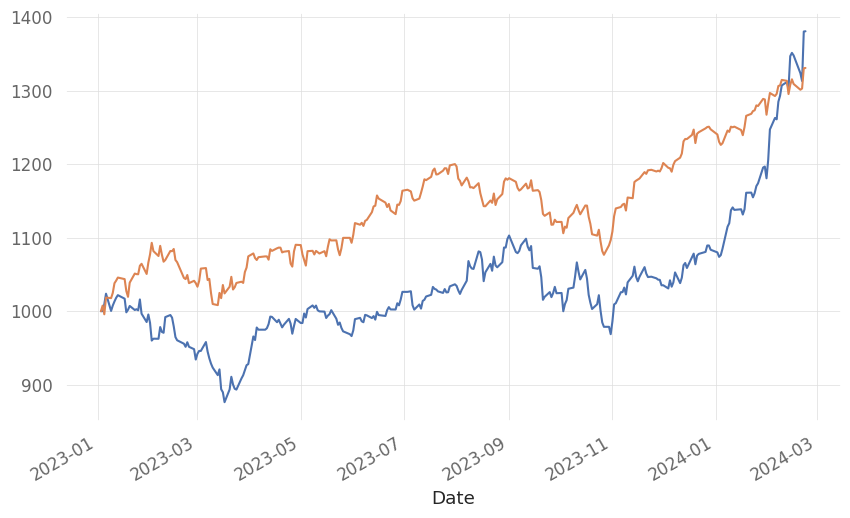

In [56]:
df_portfolio.plot()
market.plot()

In [57]:
df=pd.DataFrame(weights, columns=assets)

In [58]:
import plotly.express as px

# Assuming df is your DataFrame with data
fig = px.bar(df, barmode='stack')
fig.update_layout(
    title='Stacked Bar Chart',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Values'),
    legend=dict(title='Assets'),
)
# Create dropdown menu for variable selection
buttons = [
    dict(label=var, method='update', args=[{'visible': [col == var for col in df.columns]}])
    for var in df.columns
]
# Add an option to reset the graph
buttons.append(
    dict(label="Reset", method="update", args=[{'visible': [True] * len(df.columns)}])
)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        ),
    ]
)
fig.show()